In [77]:
import pandas as pd
import numpy as np                  # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings  
import statistics
from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing, cross_validation, svm,neighbors
from sklearn.cluster import MeanShift
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from IPython.display import Markdown
def bold(string):
    display(Markdown(string))


train=pd.read_csv('train.csv')
bold('**Our train data:**')
display(train.head())

test=pd.read_csv('test.csv')
train_original=train.copy()
test_original=test.copy()





**Our train data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
data_cleaner=[train, test]

In [79]:
train['Name'].str.findall(f"([\w\./]+)") 

0                            [Braund, Mr., Owen, Harris]
1      [Cumings, Mrs., John, Bradley, Florence, Brigg...
2                              [Heikkinen, Miss., Laina]
3      [Futrelle, Mrs., Jacques, Heath, Lily, May, Peel]
4                           [Allen, Mr., William, Henry]
5                                    [Moran, Mr., James]
6                            [McCarthy, Mr., Timothy, J]
7                     [Palsson, Master., Gosta, Leonard]
8      [Johnson, Mrs., Oscar, W, Elisabeth, Vilhelmin...
9                 [Nasser, Mrs., Nicholas, Adele, Achem]
10                   [Sandstrom, Miss., Marguerite, Rut]
11                           [Bonnell, Miss., Elizabeth]
12                    [Saundercock, Mr., William, Henry]
13                       [Andersson, Mr., Anders, Johan]
14             [Vestrom, Miss., Hulda, Amanda, Adolfina]
15                    [Hewlett, Mrs., Mary, D, Kingcome]
16                               [Rice, Master., Eugene]
17                      [Willia

**Cross Tab sex:**

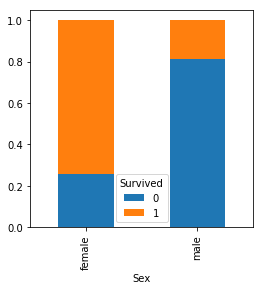

In [80]:
bold('**Cross Tab sex:**')
Gender=pd.crosstab(train['Sex'],train['Survived'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [81]:
'''Absolute frequency of Cabin.'''
abs_freq_cabin = train.Cabin.value_counts(dropna = False)
bold('**Categories of Cabin:**')
display(abs_freq_cabin.head())

"""As frequency of Cabin isn't what we expected, let's count total categories in Cabin."""
bold('**Total categories in Cabin:**')
display(abs_freq_cabin.count())


**Categories of Cabin:**

NaN            687
G6               4
C23 C25 C27      4
B96 B98          4
D                3
Name: Cabin, dtype: int64

**Total categories in Cabin:**

148

C:\Users\sushant\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 32.20 and sigma = 49.67



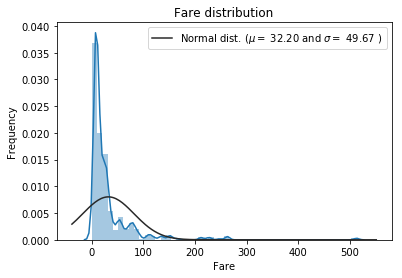

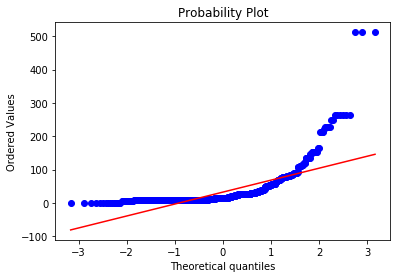

In [82]:
sns.distplot(train['Fare'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Fare'], plot=plt)
plt.show()

C:\Users\sushant\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 2.96 and sigma = 0.97



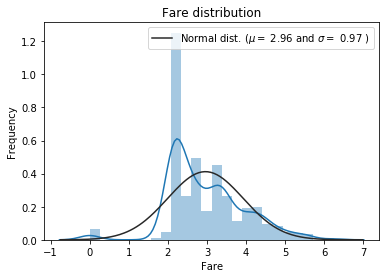

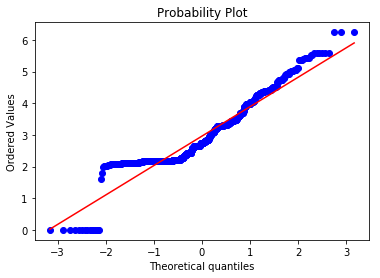

In [83]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["Fare"] = np.log1p(train["Fare"])

#Check the new distribution 
sns.distplot(train['Fare'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Fare'], plot=plt)
plt.show()

In [84]:
# """Flag all the NaNs of Cabin as 'X'."""
# train.Cabin.fillna(value = 'X', inplace = True)

# '''Keep only the 1st character where Cabin is alphanumerical.'''
# train.Cabin = train.Cabin.apply( lambda x : x[0])
# display(train.Cabin.value_counts())

# # '''After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable.'''
# # train.Cabin.agg(absolute_and_relative_freq)

# """Flag all the NaNs of Cabin as 'X'."""
# test.Cabin.fillna(value = 'X', inplace = True)

# '''Keep only the 1st character where Cabin is alphanumerical.'''
# test.Cabin = test.Cabin.apply( lambda x : x[0])
# display(test.Cabin.value_counts())

# '''After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable.'''
# train.Cabin.agg(absolute_and_relative_freq)
for dataset in data_cleaner:
    dataset=dataset.drop(['Cabin'],1,inplace=True)

In [85]:
train['Family_size']=train['SibSp']+train['Parch']+1
# display(train.head())



In [86]:
Alone=[]
for i in train.Family_size:
    if i > 1 :
        Alone.append(True)
    else:
        Alone.append(False)
Alone=pd.Series(Alone)
train['Alone']=Alone


train.Alone.replace(False,0,inplace=True)

train.Alone.replace(True,1,inplace=True)


# train.head()


# Alone=train.Family_size >1


In [87]:
test['Family_size']=test['SibSp']+test['Parch']+1
# display(test.head())

In [88]:

test_Alone=test.Family_size >1
Alone=pd.Series(test_Alone)
test['Alone']=Alone

test.Alone.replace(False,0,inplace=True)

test.Alone.replace(True,1,inplace=True)




# test.head()


In [89]:
# bins=list(range(0,100,10))#start,stop,step
# group=list(range(0,100,10))
# train['Age_bin']=pd.cut(train['Age'],bins)
# Age_bin=pd.crosstab(train['Age_bin'],train['Survived'],)

# Age_bin.div(Age_bin.sum(1), axis=0).plot(kind="bar",)
# plt.xlabel('Age')

In [90]:
# bins=list(range(0,100,10))#start,stop,step
# group=list(range(0,100,10))
# train['Cabin_bin']=pd.cut(train['Cabin'],bins)
# Cabin=pd.crosstab(train['Cabin'],train['Survived'])
# Cabin

In [91]:
# test['Cabin'].isnull().sum()

In [92]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Family_size      0
Alone            0
dtype: int64

In [93]:
for dataset in data_cleaner:
    #complete missing age with median
    dataset['Age'].fillna(-999, inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(-999, inplace = True)

#quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    dataset['Title'].replace('Mr',0,inplace=True)
    dataset['Title'].replace('Mrs',1,inplace=True)
    dataset['Title'].replace('Miss',2,inplace=True)
    dataset['Title'].replace('Master',3,inplace=True)
    dataset['Title'].replace('Dr',4,inplace=True)
    dataset['Title'].replace('Rev',5,inplace=True)
    dataset['Title'].replace('Col',6,inplace=True)
    dataset['Title'].replace('Major',7,inplace=True)
    dataset['Title'].replace('Mlle',8,inplace=True)
    dataset['Title'].replace('Don',9,inplace=True)
    dataset['Title'].replace('Jonkheer',10,inplace=True)
    dataset['Title'].replace('Capt',11,inplace=True)
    dataset['Title'].replace('Ms',12,inplace=True)
    dataset['Title'].replace('the Countess',13,inplace=True)
    dataset['Title'].replace('Sir',14,inplace=True)
    dataset['Title'].replace('Mme',15,inplace=True)
    dataset['Title'].replace('Lady',16,inplace=True)
    dataset['Title'].replace('Dona',17,inplace=True)
    
    


In [94]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family_size    0
Alone          0
Title          0
dtype: int64

In [95]:
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked'] = label.fit_transform(dataset['Embarked'])
    dataset['Title'] = label.fit_transform(dataset['Title'])
#     dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

# Target = ['Survived']

# #define x variables for original features aka feature selection
# data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
# data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
# data1_xy =  Target + data1_x
# print('Original X Y: ', data1_xy, '\n')
train
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Alone,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,1,0.0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2,2,1.0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1,1,0.0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2,1,0.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2,3,1.0,1
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,2,1,0.0,0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,1,1,0.0,2
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,2,3,1.0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,0,1,0.0,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,2,3,1.0,0


In [96]:
train=train.drop(['Name','Ticket'],1)
test=test.drop(['Name','Ticket'],1)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Alone,Title
0,1,0,3,1,22.0,1,0,2.110213,2,2,1.0,0
1,2,1,1,0,38.0,1,0,4.280593,0,2,1.0,1
2,3,1,3,0,26.0,0,0,2.188856,2,1,0.0,2
3,4,1,1,0,35.0,1,0,3.990834,2,2,1.0,1
4,5,0,3,1,35.0,0,0,2.202765,2,1,0.0,0
5,6,0,3,1,-999.0,0,0,2.246893,1,1,0.0,0
6,7,0,1,1,54.0,0,0,3.967694,2,1,0.0,0
7,8,0,3,1,2.0,3,1,3.094446,2,5,1.0,3
8,9,1,3,0,27.0,0,2,2.495954,2,3,1.0,1
9,10,1,2,0,14.0,1,0,3.436268,0,2,1.0,1


In [ ]:
X=train
# X=pd.get_dummies(X)

y=train['Survived']

# X=pd.get_dummies(X)
# test=pd.get_dummies(test)
# X

# train = pd.get_dummies(train)
# train 


In [22]:
# X=X.drop(['Cabin_T'],1)
bold('**X:**')
display(X.dtypes)
display(X.shape)
bold('**test:**')
display(test.dtypes)
display(test.shape)

**X:**

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
Family_size      int64
Alone          float64
Title            int64
dtype: object

(891, 12)

**test:**

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
Family_size      int64
Alone          float64
Title            int64
dtype: object

(418, 11)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# model =LinearDiscriminantAnalysis()
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier
model.fit(X,y)

TypeError: fit() missing 1 required positional argument: 'y'

In [45]:
pred_cv = model.predict(x_test)
accuracy_score(y_test,pred_cv)

TypeError: predict() missing 1 required positional argument: 'X'

In [ ]:

pred_test = model.predict(test)


submission=pd.read_csv("Sample_Submission.csv")

submission['Survived']=pred_test
submission['PassengerId']=test_original['PassengerId']

pred_test = model.predict(test)

pd.DataFrame(submission, columns=['PassengerId','Survived']).to_csv('logistic.csv')